In [1]:
#Loading The File
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
#Reading The data file here
data=loadmat('ex5data1.mat')
#Adding all the features and target
X=data['X']
y=data['y']
Xtest=data['Xtest']
ytest=data['ytest']
Xval=data['Xval']
yval=data['yval']

Text(0,0.5,'Water flowing out of dam')

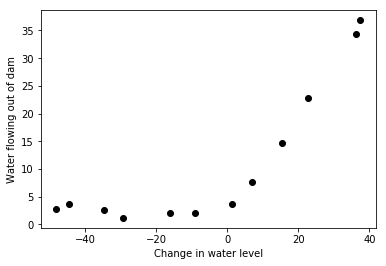

In [2]:
plt.scatter(X,y,color='black')
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of dam")

In [3]:
from sklearn.linear_model import LinearRegression
lR=LinearRegression()
lR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
#Now slope and intercept Of the above model
m=lR.coef_[0]
b=lR.intercept_
print("Slope is {} and Intercept Is {}".format(m,b))

Slope is [0.36777923] and Intercept Is [13.08790351]


Text(0,0.5,'Water flowing out of dam')

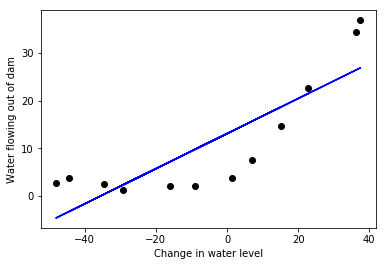

In [5]:
plt.scatter(X,y,color='black')
predicted_values = [m * i + b for i in X]
plt.plot(X, predicted_values, 'b')
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of dam")

Training score: 0.9996297875295719
Training score: 0.9992054771048997


E:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.713252e-26
  overwrite_a=True).T


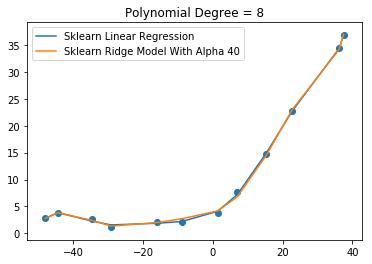

In [105]:
#Using Polyomiall features on our  training set using scikit learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
d=8
poly=PolynomialFeatures(degree=d)
Xpoly=poly.fit_transform(X)
newLR=LinearRegression()
newLR.fit(Xpoly,y)
#Using ridge model here
regressor = Ridge(alpha=40)
regressor.fit(Xpoly,y)
#Prediction using the two models
pred = newLR.predict(Xpoly)
predRidge=regressor.predict(Xpoly)
print('Training score: {}'.format(newLR.score(Xpoly, y)))
print('Training score: {}'.format(regressor.score(Xpoly, y)))

#Plotting the polynomial regression here
new_X, new_y = zip(*sorted(zip(X, pred))) # sort values for plotting
new_X_ridge, new_y_ridge = zip(*sorted(zip(X, predRidge))) # sort values for plotting
plt.plot(new_X, new_y,label="Sklearn Linear Regression")
plt.plot(new_X_ridge, new_y_ridge,label="Sklearn Ridge Model With Alpha {}".format(regressor.alpha))
plt.scatter(X,y)
#The degreeof polynomial which we are taking here
plt.title("Polynomial Degree = {}".format(d))
plt.legend()

In [89]:
# Make LC with our estimator object from above, use MSE metric
from sklearn.model_selection import learning_curve

train_sz, train_errs, cv_errs = learning_curve(estimator=newLR, X=X, y=y, cv=4,
                                              train_sizes=np.linspace(0.05, 1, 20),
                                              scoring="neg_mean_squared_error")  

# For each training subset, compute average error over the 3-fold cross val
tr_err = np.mean(train_errs, axis=1)
cv_err = np.mean(cv_errs, axis=1) 

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:1192: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 9 instead of 20).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


In [90]:
train_sz

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
train_errs

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-8.87468518e-31, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-5.85185260e+01, -6.57319009e+00, -6.57319009e+00,
        -6.57319009e+00],
       [-5.51651851e+01, -1.49845764e+01, -5.68535538e+00,
        -5.68535538e+00],
       [-4.43001645e+01, -1.86631327e+01, -2.63080976e+01,
        -2.63080976e+01],
       [-5.49190051e+01, -3.02729626e+01, -3.88879250e+01,
        -3.88879250e+01],
       [-5.14416313e+01, -3.64255523e+01, -4.07942132e+01,
        -4.01970433e+01],
       [-5.13745879e+01, -3.74476491e+01, -4.97334745e+01,
        -3.63457174e+01],
       [-4.70009285e+01, -3.45442352e+01, -4.42698958e+01,
        -4.52188108e+01]])

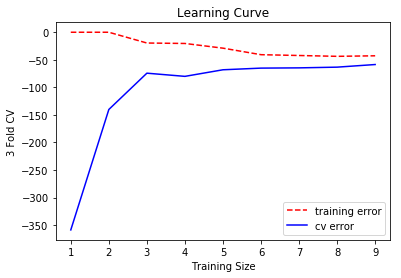

In [92]:
# Plot the errors to make a learning curve!
#Not accurate if possible use some other this is wrong!
fig, ax = plt.subplots()
ax.plot(train_sz, tr_err, linestyle="--", color="r", label="training error")
ax.plot(train_sz, cv_err, linestyle="-", color="b", label="cv error")
plt.xlabel("Training Size")
plt.ylabel("3 Fold CV")
plt.title("Learning Curve")
ax.legend(loc="lower right")